In [1]:
#Import the libraries
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Load the data set
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
#Print the shape 
print(train_images.shape)# 60,000 rows of 28 x 28 pixel images
print(test_images.shape) # 10,000 rows of 28 x 28 pixel images

(60000, 28, 28)
(10000, 28, 28)


In [4]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

Image Label: 0
Image Label: 9
Image Label: 5
Image Label: 5
Image Label: 7
Image Label: 9
Image Label: 1
Image Label: 0
Image Label: 6
Image Label: 4


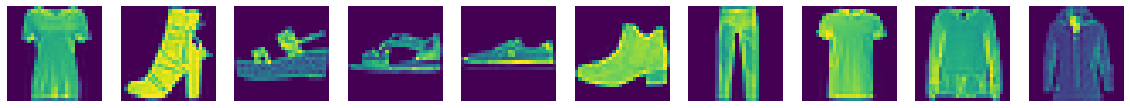

In [5]:
plt.figure(figsize=(20,20))
for i in range(10,20):
    plt.subplot(6, 10, i-10+1)
    img_index = i #<<< You can update this value to look at other images
    img = train_images[img_index]
    plt.imshow(img)
    print("Image Label: " + str(train_labels[img_index]))
    plt.axis("off")
# plt.subplots_adjust(wspace=-0.5, hspace=1)
plt.show()

In [6]:
train_images[0].shape, train_images[0].dtype

((28, 28), dtype('uint8'))

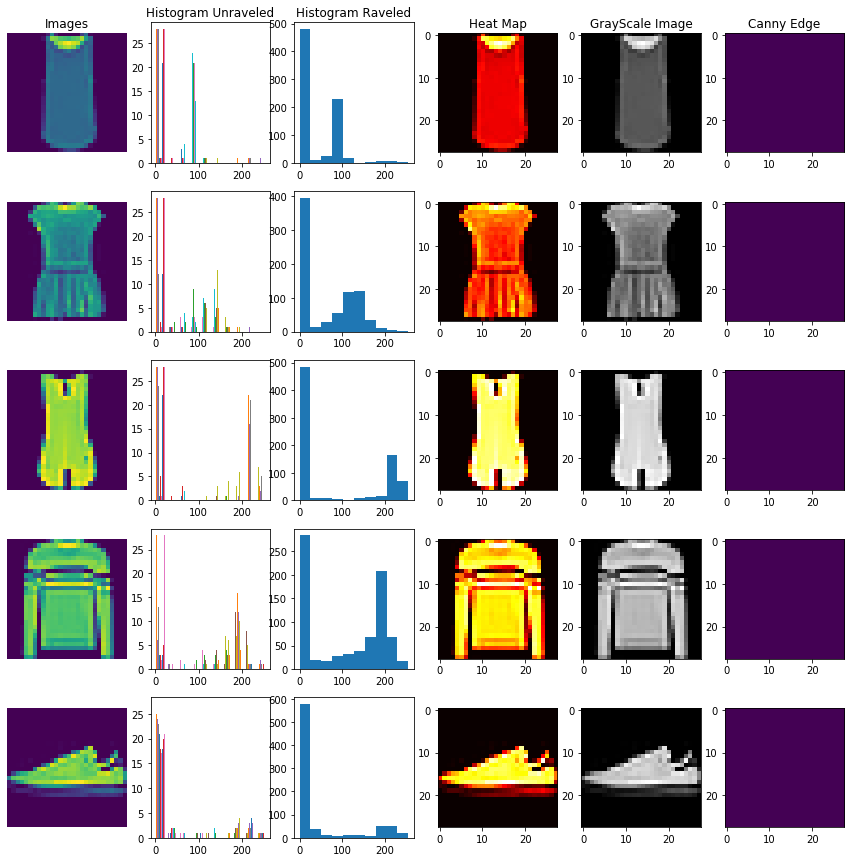

In [7]:
from skimage.util import random_noise
from skimage import feature
fig, ax = plt.subplots(5, 6, figsize=(15, 15))

for row, img in enumerate(train_images[2:7]):
    ax[row, 0].imshow(img)
    ax[row, 1].hist(img)
    ax[row, 2].hist(img.ravel())
    ax[row, 3].imshow(img, cmap='hot', interpolation='nearest')
    ax[row, 4].imshow(img, cmap='gray')
    edges1 = feature.canny(img)
    ax[row, 5].imshow(edges1)
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Images')
        ax[row, 1].set_title('Histogram Unraveled')
        ax[row, 2].set_title('Histogram Raveled')
        ax[row, 3].set_title('Heat Map')
        ax[row, 4].set_title('GrayScale Image')
        ax[row, 5].set_title('Canny Edge')
plt.show()



In [8]:
import numpy as np
import PIL


class SaltAndPepperNoise(object):
    def __init__(self,
                 treshold:float = 0.005,
                 imgType:str = "cv2",
                 lowerValue:int = 5,
                 upperValue:int = 250,
                 noiseType:str = "SnP"):
        self.treshold = treshold
        self.imgType = imgType
        self.lowerValue = lowerValue # 255 would be too high
        self.upperValue = upperValue # 0 would be too low
        if (noiseType != "RGB") and (noiseType != "SnP"):
            raise Exception("'noiseType' not of value {'SnP', 'RGB'}")
        else:
            self.noiseType = noiseType
        super(SaltAndPepperNoise).__init__()

    def __call__(self, img):
        if self.imgType == "PIL":
            img = np.array(img)
        if type(img) != np.ndarray:
            raise TypeError("Image is not of type 'np.ndarray'!")
        
        if self.noiseType == "SnP":
            random_matrix = np.random.rand(img.shape[0],img.shape[1])
            img[random_matrix>=(1-self.treshold)] = self.upperValue
            img[random_matrix<=self.treshold] = self.lowerValue
        elif self.noiseType == "RGB":
            random_matrix = np.random.random(img.shape)      
            img[random_matrix>=(1-self.treshold)] = self.upperValue
            img[random_matrix<=self.treshold] = self.lowerValue

        if self.imgType == "cv2":
            return img
        elif self.imgType == "PIL":
            # return as PIL image for torchvision transforms compliance
            return PIL.Image.fromarray(img)

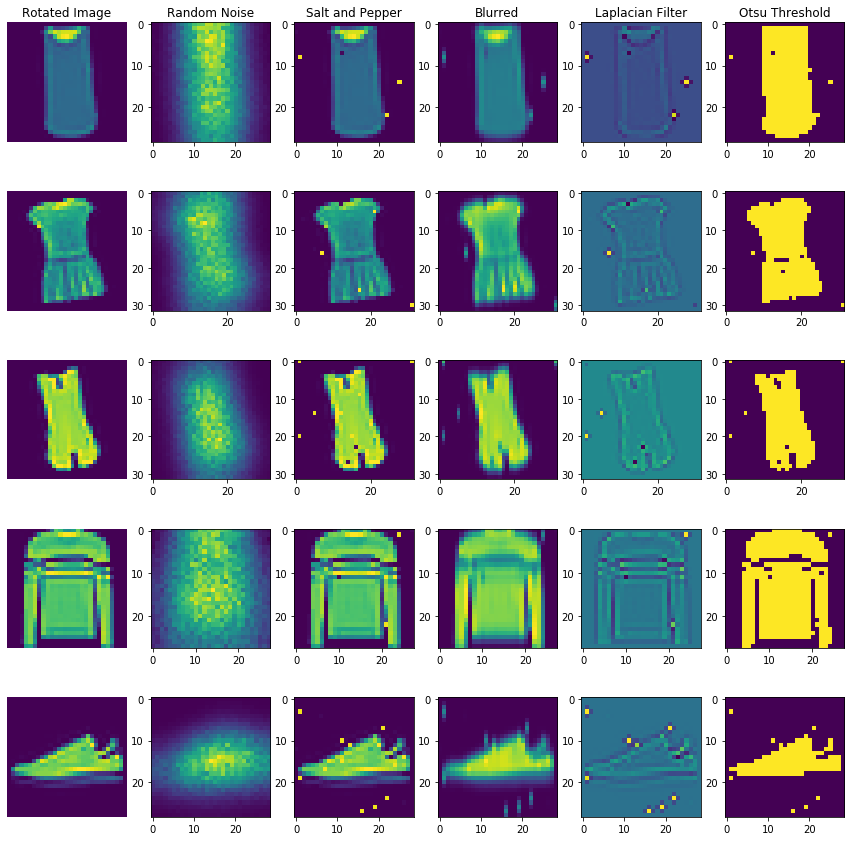

In [9]:
from skimage.util import random_noise
from skimage import feature
from scipy import ndimage as ndi
import skimage
import random
fig, ax = plt.subplots(5, 6, figsize=(15, 15))
SnP_noise = SaltAndPepperNoise()

for row, img in enumerate(train_images[2:7]):
    img = ndi.rotate(img, random.randint(0,10), mode='constant')
    ax[row, 0].imshow(img)
    img1 = ndi.gaussian_filter(img, 4)
    img1 = random_noise(img1, mode='speckle', mean=0.1)
    ax[row, 1].imshow(img1)
    ax[row, 2].imshow(SnP_noise(img))
    blurred = skimage.filters.gaussian( img, truncate=3.5, multichannel=True)
    ax[row, 3].imshow(blurred)
    Laplacian = skimage.filters.laplace(img)
    ax[row, 4].imshow(Laplacian)
    Otsu = skimage.filters.threshold_otsu(img)
    binary = img > Otsu
    ax[row, 5].imshow(binary)
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Rotated Image')
        ax[row, 1].set_title('Random Noise')
        ax[row, 2].set_title('Salt and Pepper')
        ax[row, 3].set_title('Blurred')
        ax[row, 4].set_title('Laplacian Filter')
        ax[row, 5].set_title('Otsu Threshold')
plt.show()

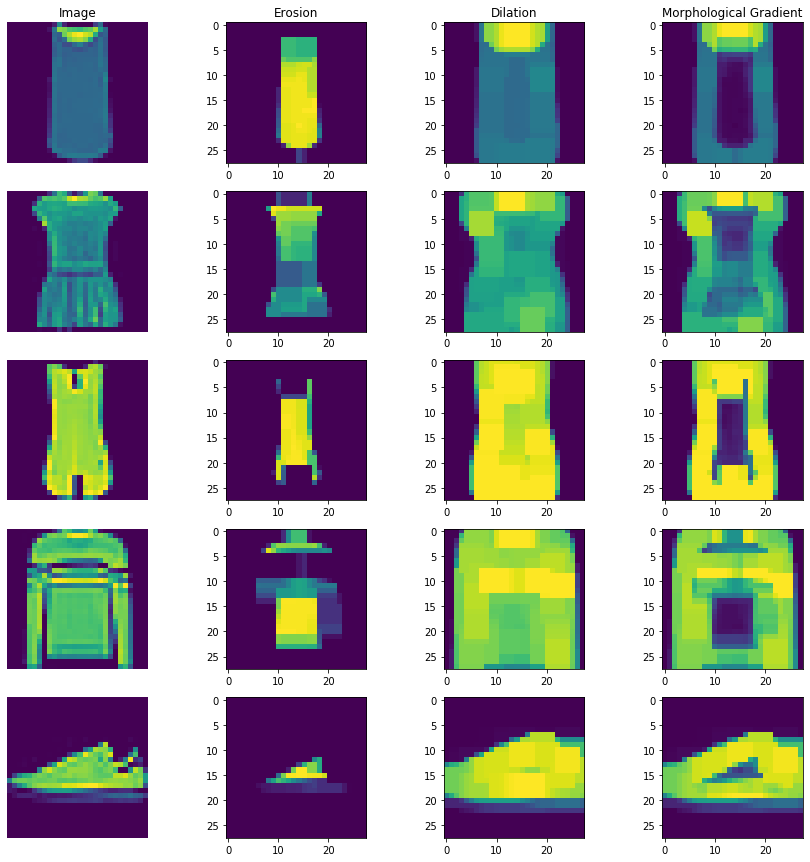

In [9]:
import cv2
fig, ax = plt.subplots(5, 4, figsize=(15, 15))

for row, img in enumerate(train_images[2:7]):
    ax[row, 0].imshow(img)
    kernel = np.ones((5,5),np.uint8)
    erosion = cv2.erode(img,kernel,iterations = 1)
    ax[row, 1].imshow(erosion)
    dilation = cv2.dilate(img,kernel,iterations = 1)
    ax[row, 2].imshow(dilation)
    gradient = cv2.morphologyEx(img, cv2.MORPH_GRADIENT, kernel)
    ax[row, 3].imshow(gradient)
    ax[row, 0].axis('off')
    if row == 0:
        ax[row, 0].set_title('Image')
        ax[row, 1].set_title('Erosion')
        ax[row, 2].set_title('Dilation')
        ax[row, 3].set_title('Morphological Gradient')
plt.show()

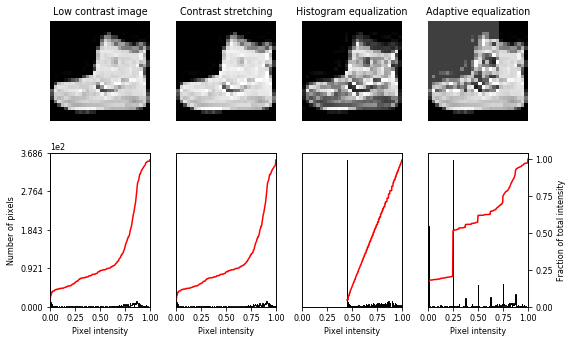

In [11]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data, img_as_float
from skimage import exposure
matplotlib.rcParams['font.size'] = 8
def plot_img_and_hist(image, axes, bins=256):
    image = img_as_float(image)
    ax_img, ax_hist = axes
    ax_cdf = ax_hist.twinx()

    # Display image
    ax_img.imshow(image, cmap=plt.cm.gray)
    ax_img.set_axis_off()

    # Display histogram
    ax_hist.hist(image.ravel(), bins=bins, histtype='step', color='black')
    ax_hist.ticklabel_format(axis='y', style='scientific', scilimits=(0, 0))
    ax_hist.set_xlabel('Pixel intensity')
    ax_hist.set_xlim(0, 1)
    ax_hist.set_yticks([])

    # Display cumulative distribution
    img_cdf, bins = exposure.cumulative_distribution(image, bins)
    ax_cdf.plot(bins, img_cdf, 'r')
    ax_cdf.set_yticks([])

    return ax_img, ax_hist, ax_cdf


# Load an example image
img = train_images[0]

# Contrast stretching
p2, p98 = np.percentile(img, (2, 98))
img_rescale = exposure.rescale_intensity(img, in_range=(p2, p98))

# Equalization
img_eq = exposure.equalize_hist(img)

# Adaptive Equalization
img_adapteq = exposure.equalize_adapthist(img, clip_limit=0.03)

# Display results
fig = plt.figure(figsize=(8, 5))
axes = np.zeros((2, 4), dtype=np.object)
axes[0, 0] = fig.add_subplot(2, 4, 1)
for i in range(1, 4):
    axes[0, i] = fig.add_subplot(2, 4, 1+i, sharex=axes[0,0], sharey=axes[0,0])
for i in range(0, 4):
    axes[1, i] = fig.add_subplot(2, 4, 5+i)

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img, axes[:, 0])
ax_img.set_title('Low contrast image')

y_min, y_max = ax_hist.get_ylim()
ax_hist.set_ylabel('Number of pixels')
ax_hist.set_yticks(np.linspace(0, y_max, 5))

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_rescale, axes[:, 1])
ax_img.set_title('Contrast stretching')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_eq, axes[:, 2])
ax_img.set_title('Histogram equalization')

ax_img, ax_hist, ax_cdf = plot_img_and_hist(img_adapteq, axes[:, 3])
ax_img.set_title('Adaptive equalization')

ax_cdf.set_ylabel('Fraction of total intensity')
ax_cdf.set_yticks(np.linspace(0, 1, 5))

# prevent overlap of y-axis labels
fig.tight_layout()
plt.show()


In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

In [11]:

model.compile(
   optimizer=tf.optimizers.Adam(), 
   loss='sparse_categorical_crossentropy', 
   metrics = ['accuracy'])

In [12]:
history = model.fit(train_images, 
          train_labels,
          validation_data=(test_images, test_labels),  #It expects integers because of the sparse_categorical_crossentropy loss function
          epochs=10, #number of iterations over the entire dataset to train on
          batch_size=32)#number of samples per gradient update for training


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 22s 364us/sample - loss: 3.2587 - accuracy: 0.7105 - val_loss: 0.8329 - val_accuracy: 0.7536
Epoch 2/10
60000/60000 [==============================] - 15s 248us/sample - loss: 0.6629 - accuracy: 0.7801 - val_loss: 0.7086 - val_accuracy: 0.7778
Epoch 3/10
60000/60000 [==============================] - 29s 483us/sample - loss: 0.5826 - accuracy: 0.8059 - val_loss: 0.6219 - val_accuracy: 0.8038
Epoch 4/10
60000/60000 [==============================] - 38s 638us/sample - loss: 0.5161 - accuracy: 0.8272 - val_loss: 0.5516 - val_accuracy: 0.8198
Epoch 5/10
60000/60000 [==============================] - 47s 777us/sample - loss: 0.4866 - accuracy: 0.8353 - val_loss: 0.5798 - val_accuracy: 0.8089 - accu
Epoch 6/10
60000/60000 [==============================] - 38s 640us/sample - loss: 0.4794 - accuracy: 0.8386 - val_loss: 0.5316 - val_accuracy: 0.8266
Epoch 7/10
60000/60000 [=============

In [15]:
#Evaluate the model
model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 1s 116us/sample - loss: 0.5372 - accuracy: 0.8264


[0.5372060189962387, 0.8264]

In [16]:
#Make a prediction
predictions = model.predict(test_images[:5])
print(np.argmax(predictions, axis=1)) #Print the predicted labels
print(test_labels[:5]) #Print the actual labels


[9 2 1 1 6]
[9 2 1 1 6]


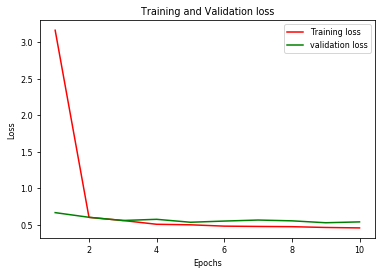

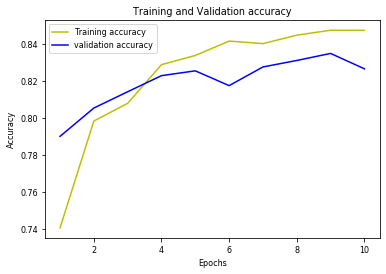

In [17]:
plt.figure(1)
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'g', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(2)
acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, acc_train, 'y', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

0-T-shirt/top

1-Trouser/pants

2-Pullover shirt

3-Dress

4-Coat

5-Sandal

6-Shirt

7-Sneaker

8-Bag

9-Ankle boot

In [18]:
i0 = [i for i in range(0,60000) if train_labels[i] == 0]
i1 = [i for i in range(0,60000) if train_labels[i] == 1]
i2 = [i for i in range(0,60000) if train_labels[i] == 2]
i3 = [i for i in range(0,60000) if train_labels[i] == 3]
i4 = [i for i in range(0,60000) if train_labels[i] == 4]
i5 = [i for i in range(0,60000) if train_labels[i] == 5]
i6 = [i for i in range(0,60000) if train_labels[i] == 6]
i7 = [i for i in range(0,60000) if train_labels[i] == 7]
i8 = [i for i in range(0,60000) if train_labels[i] == 8]
i9 = [i for i in range(0,60000) if train_labels[i] == 9]

labels=['T-shirt/Top','Trouser/Pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']

In [19]:
l=[]
l.append(len(i0))
l.append(len(i1))
l.append(len(i2))
l.append(len(i3))
l.append(len(i4))
l.append(len(i5))
l.append(len(i6))
l.append(len(i7))
l.append(len(i8))
l.append(len(i9))

In [20]:
print('1.casual \n 2.formal \n 3.sports \n 4.collegewear \n 5.winterwear \n 6.partywear')

1.casual 
 2.formal 
 3.sports 
 4.collegewear 
 5.winterwear 
 6.partywear


In [21]:
z=int(input())

4


In [22]:
import cv2
import matplotlib.pyplot as plt

labels=['T-shirt/Top','Trouser/Pants','Pullover shirt','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankel Boot']
def display(i):  
  plt.figure(figsize=(3,3))
  plt.subplot(1, 3, 1)
  plt.imshow(train_images[i[0]])
  plt.title("No:-" + str(i[0]))
  plt.subplot(1, 3, 2)
  plt.imshow(train_images[i[1]])
  plt.title("No:-" + str(i[1]))
  plt.subplot(1, 3, 3)
  plt.imshow(train_images[i[2]])
  plt.title("No:-" + str(i[2]))
  plt.suptitle(labels[train_labels[i[0]]])
  plt.show()





--------Male-----------


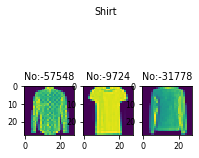

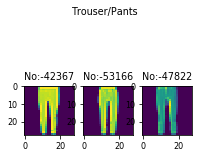

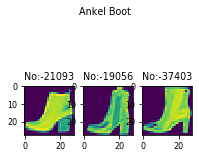

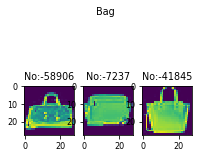

--------Female-----------


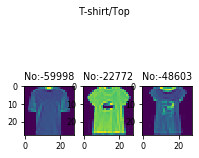

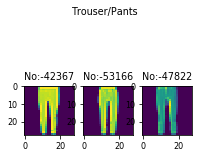

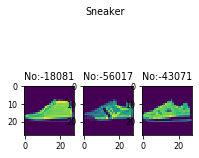

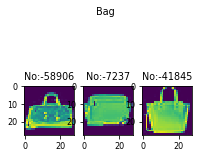

In [23]:
import random
w0=[i0[random.randint(0,l[0])],i0[random.randint(0,l[0])],i0[random.randint(0,l[0])]]
w1=[i1[random.randint(0,l[1])],i1[random.randint(0,l[1])],i1[random.randint(0,l[1])]]
w2=[i2[random.randint(0,l[2])],i2[random.randint(0,l[2])],i2[random.randint(0,l[2])]]
w3=[i3[random.randint(0,l[3])],i3[random.randint(0,l[3])],i3[random.randint(0,l[3])]]
w4=[i4[random.randint(0,l[4])],i4[random.randint(0,l[4])],i4[random.randint(0,l[4])]]
w5=[i5[random.randint(0,l[5])],i5[random.randint(0,l[5])],i5[random.randint(0,l[5])]]
w6=[i6[random.randint(0,l[6])],i6[random.randint(0,l[6])],i6[random.randint(0,l[6])]]
w7=[i7[random.randint(0,l[7])],i7[random.randint(0,l[7])],i7[random.randint(0,l[7])]]
w8=[i8[random.randint(0,l[8])],i8[random.randint(0,l[8])],i8[random.randint(0,l[8])]]
w9=[i9[random.randint(0,l[9])],i9[random.randint(0,l[9])],i9[random.randint(0,l[9])]]
 
if z==1:
  print('--------Male-----------')
  for i in [w0,w1,w7]:
    display(i)
  print('--------Female-----------')
  for i in [w3,w7]:
    display(i)
elif z==2:
  print('--------Male-----------')
  for i in [w6,w1,w9]:
    display(i)
  print('--------Female-----------')
  for i in [w6,w1,w5]:
    display(i)
elif z==3:
  print('--------Male-----------')
  for i in [w0,w1,w7]:
    display(i)
  print('--------Female-----------')
  for i in [w0,w1,w7]:
    display(i)
elif z==4:
  print('--------Male-----------')
  for i in [w6,w1,w9,w8]:
    display(i)
  print('--------Female-----------')
  for i in [w0,w1,w7,w8]:
    display(i)
elif z==5:
  print('--------Male-----------')
  for i in [w2,w1,w9]:
    display(i)
  print('--------Female-----------')
  for i in [w2,w1,w7]:
    display(i)
else:
  print('--------Male-----------')
  for i in [w4,w6,w1,w9]:
    display(i)
  print('--------Female-----------')
  for i in [w3,w5]:
    display(i)

In [24]:


w0=i0[random.randint(0,l[0])]
w1=i1[random.randint(0,l[1])]
w2=i2[random.randint(0,l[2])]
w3=i3[random.randint(0,l[3])]
w4=i4[random.randint(0,l[4])]
w5=i5[random.randint(0,l[5])]
w6=i6[random.randint(0,l[6])]
w7=i7[random.randint(0,l[7])]
w8=i8[random.randint(0,l[8])]
w9=i9[random.randint(0,l[9])]

In [26]:
from tkinter import *
from PIL import ImageTk,Image
from tkinter import ttk


root = Tk()
root.geometry("550x600")
# root.configure(bg="#374B73")

options=[
    "Casual Wear",
    "Formal Wear",
    "Sports Wear",
    "College Wear",
    "Winter Wear",
    "Party Wear",
]

def rec_tshirt():
    win=Toplevel(root)
    win.title('Tshirt Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="T-shirts").place(x=250,y=25)
    for i in range(3):
        x1=i0[random.randint(0,l[0])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="T-shirt No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="T-shirt No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="T-shirt No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

def rec_trouser():
    win=Toplevel(root)
    win.title('Tshirt Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Trouser").place(x=250,y=25)
    for i in range(3):
        x1=i1[random.randint(0,l[1])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Trouser No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Trouser No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Trouser No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

def rec_sneaker():
    win=Toplevel(root)
    win.title('Tshirt Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Sneaker").place(x=250,y=25)
    for i in range(3):
        x1=i7[random.randint(0,l[7])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Sneaker No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Sneaker No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Sneaker No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

def rec_pullover():
    win=Toplevel(root)
    win.title('Pullover Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Pullover").place(x=250,y=25)
    for i in range(3):
        x1=i2[random.randint(0,l[2])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Pullover No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Pullover No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Pullover No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

    
def rec_dress():
    win=Toplevel(root)
    win.title('Dress Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Dress").place(x=250,y=25)
    for i in range(3):
        x1=i3[random.randint(0,l[3])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Dress No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Dress No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Dress No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

    
def rec_coat():
    win=Toplevel(root)
    win.title('Coat Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Coats").place(x=250,y=25)
    for i in range(3):
        x1=i4[random.randint(0,l[4])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Coat No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Coat No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Coat No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

    
def rec_sandal():
    win=Toplevel(root)
    win.title('Sandal Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Sandals").place(x=250,y=25)
    for i in range(3):
        x1=i5[random.randint(0,l[5])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Sandal No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Sandal No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Sandal No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

    
def rec_shirt():
    win=Toplevel(root)
    win.title('shirt Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="shirts").place(x=250,y=25)
    for i in range(3):
        x1=i6[random.randint(0,l[6])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="shirt No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="shirt No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="shirt No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)


    
def rec_boot():
    win=Toplevel(root)
    win.title('Ankle Boot Recommendation')
    win.geometry("550x600")
    win.configure(bg="#374B73")
    mylabel=Label(win,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text="Ankle Boots").place(x=250,y=25)
    for i in range(3):
        x1=i9[random.randint(0,l[9])]
        plt.imsave('image_new.jpg',train_images[x1])
        load = Image.open('image_new.jpg')
        load = load. resize((75, 75), Image. ANTIALIAS)
        render = ImageTk.PhotoImage(load)
        img = Label(win, image=render)
        img.image = render
        if i==0:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Boot No. : "+ str(x1)).place(x=200,y=120)
            img.place(x=250,y=150)
        elif i==1:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Boot No. : "+ str(x1)).place(x=200,y=270)
            img.place(x=250,y=300)
        else:
            xyz=Label(win,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text="Boot No. : "+ str(x1)).place(x=200,y=420)
            img.place(x=250,y=450)
    Button(win,font=("gabriel",12,'bold'), height=1,text = 'Back',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=win.destroy).place(x=250,y=560)

        
                
        
        
    
    
def createNewWindow():
    newWindow = Toplevel(root)
    newWindow.title('Choose your Mood')
    newWindow.geometry("550x650")
    newWindow.configure(bg="#374B73")
    

    n = StringVar()
    
    
    def func(event):
        w0=i0[random.randint(0,l[0])]
        w1=i1[random.randint(0,l[1])]
        w2=i2[random.randint(0,l[2])]
        w3=i3[random.randint(0,l[3])]
        w4=i4[random.randint(0,l[4])]
        w5=i5[random.randint(0,l[5])]
        w6=i6[random.randint(0,l[6])]
        w7=i7[random.randint(0,l[7])]
        w8=i8[random.randint(0,l[8])]
        w9=i9[random.randint(0,l[9])]

        mylabel=Label(newWindow,font=("gabriel",14,'bold'),fg="#FFE3E3",bg="#374B73",text="So it's a "+ n.get()+' Today!!').place(x=180,y=50)
        if n.get()=="Casual Wear":
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Men').place(x=250,y=100)
            for i in [w0,w1,w7]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w0:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=150)
                    img.place(x=100,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_tshirt).place(x=100,y=283)
                elif i== w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=150)
                    img.place(x=250, y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=283)
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=150)
                    img.place(x=400,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sneaker).place(x=400,y=283)
                                   
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Women').place(x=250,y=350)
           
            for i in [w3,w7]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w3:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=400)
                    img.place(x=100,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_dress).place(x=100,y=533)

                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=400)
                    img.place(x=250,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sneaker).place(x=250,y=533)

        elif n.get()=="Formal Wear":
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Men').place(x=250,y=100)
            for i in [w6,w1,w9]:
#                 random_generate()
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w6:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=150)
                    img.place(x=100,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_shirt).place(x=100,y=283)
                
                elif i==w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=150)
                    img.place(x=250, y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=283)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=150)
                    img.place(x=400,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_boot).place(x=400,y=283)
                
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Women').place(x=250,y=350)
            for i in [w6,w1,w5]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w6:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=400)
                    img.place(x=100,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_shirt).place(x=100,y=533)
                
                elif i==w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=400)
                    img.place(x=250, y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=533)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=400)
                    img.place(x=400,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sandal).place(x=400,y=533)
                
        elif n.get()=="Sports Wear":
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Men').place(x=250,y=100)
            for i in [w0,w1,w7]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w0:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=150)
                    img.place(x=100,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_tshirt).place(x=100,y=283)
                
                elif i== w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=150)
                    img.place(x=250, y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=283)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=150)
                    img.place(x=400,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sneaker).place(x=400,y=283)
                
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Women').place(x=250,y=350)
            for i in [w0,w1,w7]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w0:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=400)
                    img.place(x=100,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_tshirt).place(x=100,y=533)
                
                elif i== w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=400)
                    img.place(x=250, y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=533)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=400)
                    img.place(x=400,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sneaker).place(x=400,y=533)
                
                    
        elif n.get()=="College Wear":
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Men').place(x=250,y=100)
            for i in [w6,w1,w9]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w6:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=150)
                    img.place(x=100,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_shirt).place(x=100,y=283)
                
                elif i== w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=150)
                    img.place(x=250, y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=283)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=150)
                    img.place(x=400,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_boot).place(x=400,y=283)
                
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Women').place(x=250,y=350)
            for i in [w0,w1,w7]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w0:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=400)
                    img.place(x=100,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_tshirt).place(x=100,y=533)
                
                elif i== w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=400)
                    img.place(x=250, y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=533)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=400)
                    img.place(x=400,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sneaker).place(x=400,y=533)
                
        elif n.get()=="Winter Wear":
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Men').place(x=250,y=100)
            for i in [w2,w1,w9]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w2:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=150)
                    img.place(x=100,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_pullover).place(x=100,y=283)
                
                elif i== w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=150)
                    img.place(x=250, y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=283)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=150)
                    img.place(x=400,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_boot).place(x=400,y=283)
                
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Women').place(x=250,y=350)
            for i in [w2,w1,w7]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w2:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=400)
                    img.place(x=100,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_pullover).place(x=100,y=533)
                
                elif i==w1:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=400)
                    img.place(x=250, y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=250,y=533)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=400)
                    img.place(x=400,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sneaker).place(x=400,y=533)
                
        elif n.get()=="Party Wear":
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Men').place(x=250,y=100)
            for i in [w4,w6,w1]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w4:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=150)
                    img.place(x=100,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_coat).place(x=100,y=283)
                
                elif i== w6:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=150)
                    img.place(x=250, y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_shirt).place(x=250,y=283)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=400,y=150)
                    img.place(x=400,y=200)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_trouser).place(x=400,y=283)
                
            xyz=Label(newWindow,font=("gabriel",14,'bold'),fg="#FF8197",bg="#374B73",text='For Women').place(x=250,y=350)
            for i in [w3,w5]:
                plt.imsave('image_new.jpg',train_images[i])
                load = Image.open('image_new.jpg')
                load = load. resize((75, 75), Image. ANTIALIAS)
                render = ImageTk.PhotoImage(load)
                img = Label(newWindow, image=render)
                img.image = render
                if i==w3:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=100,y=400)
                    img.place(x=100,y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_dress).place(x=100,y=533)
                
                else:
                    xyz=Label(newWindow,font=("gabriel",14),fg="#FFE3E3",bg="#374B73",text=labels[train_labels[i]]).place(x=250,y=400)
                    img.place(x=250, y=450)
                    Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Options ',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=rec_sandal).place(x=250,y=533)
                
                
        Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'Click Me for new Event !',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command= createNewWindow).place(x=150,y=600)
        Button(newWindow,font=("gabriel",12,'bold'), height=1,text = 'EXIT !',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command=newWindow.destroy).place(x=450,y=600)



    
    n.set(options[0])
    drop=OptionMenu(newWindow,n,*options,command=func)
    drop.place(x=240,y=10)
    
    


root.title("STYLACED")           # Add a title
canvas = Canvas(root, width = 400, height = 550)
canvas.pack()
img = ImageTk.PhotoImage(Image.open("stylaced1.png"))
canvas.create_image(20, 20, anchor=NW, image=img)
Button(root,font=("gabriel",12,'bold'), height=1,text = 'Click Me !',bg="#FF8197", activebackground="#FF8197",fg='#374B73',command= createNewWindow).pack(side = TOP)


root.mainloop()